<a href="https://colab.research.google.com/github/rahu2004/Kidney-disease-analysis-/blob/main/CKD_prediction_eva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

#Step to be Followed in Machine Learning

#1. Import LIB
#2. Read the data
#3. Preprocessing->NULL Cleaning,Character data encodeing
#4. Model Training
#5. Model Testing
#6. Prediction

#data Reading


In [ ]:
data=pd.read_csv("/content/kidney_disease (1).csv")

data.tail(5)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd
399,399,58.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,53,6800,6.1,no,no,no,good,no,no,notckd


#Preprocessing

In [ ]:
data.info

<bound method DataFrame.info of       id   age    bp     sg   al   su     rbc        pc         pcc  \
0      0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent   
1      1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent   
2      2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent   
3      3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present   
4      4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent   
..   ...   ...   ...    ...  ...  ...     ...       ...         ...   
395  395  55.0  80.0  1.020  0.0  0.0  normal    normal  notpresent   
396  396  42.0  70.0  1.025  0.0  0.0  normal    normal  notpresent   
397  397  12.0  80.0  1.020  0.0  0.0  normal    normal  notpresent   
398  398  17.0  60.0  1.025  0.0  0.0  normal    normal  notpresent   
399  399  58.0  80.0  1.025  0.0  0.0  normal    normal  notpresent   

             ba  ...  pcv    wc   rc  htn   dm  cad appet   pe  ane  \
0    notpresent  ...   44  7800  5.2  yes  y

In [ ]:
len(data.columns)

26

In [ ]:
#Null checking

list_null=data.isnull().sum()

In [ ]:
list_null

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [ ]:
list_col=data.columns


list_col

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [ ]:
obj_list=data.select_dtypes("object").columns

obj_list

Index(['rbc', 'pc', 'pcc', 'ba', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

#Label Encode

In [ ]:
from sklearn.preprocessing import LabelEncoder

encode=LabelEncoder()

for column in obj_list:
  # print(column)
  data[column]=encode.fit_transform(data[column])


In [ ]:
#after encoding

data

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,2,1,0,0,...,32,72,34,1,4,1,0,0,0,0
1,1,7.0,50.0,1.020,4.0,0.0,2,1,0,0,...,26,56,49,0,3,1,0,0,0,0
2,2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,...,19,70,49,0,4,1,1,0,1,0
3,3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,...,20,62,19,1,3,1,1,1,1,0
4,4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,...,23,68,27,0,3,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,1,1,0,0,...,35,62,30,0,3,1,0,0,0,2
396,396,42.0,70.0,1.025,0.0,0.0,1,1,0,0,...,42,72,44,0,3,1,0,0,0,2
397,397,12.0,80.0,1.020,0.0,0.0,1,1,0,0,...,37,61,36,0,3,1,0,0,0,2
398,398,17.0,60.0,1.025,0.0,0.0,1,1,0,0,...,39,67,41,0,3,1,0,0,0,2


#Completed the Object->int conversion

Now we'll work on NULL values

In [ ]:
for col in range(0,len(list_col)):
  if(list_null[col]>0):
    data[list_col[col]]=data[list_col[col]].fillna(data[list_col[col]].median())

In [ ]:
data.isnull().sum()

id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

#Data Seperation

Train,Test

In [ ]:
#Dependednt and Independent

X=data.drop('classification',axis=1)


y=data['classification']

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [ ]:
from sklearn.linear_model import LinearRegression

linear_reg=LinearRegression()

In [ ]:
linear_reg.fit(X_train,y_train)

LinearRegression()

In [ ]:
linear_reg.score(X_test,y_test)

0.7931110470686912

In [ ]:
from sklearn.linear_model import LogisticRegression


log_reg=LogisticRegression()

log_reg.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
log_reg.score(X_train,y_train)

1.0

In [ ]:
log_reg.score(X_test,y_test)

0.975

#Username-Modelname

In [ ]:
from sklearn.tree import DecisionTreeClassifier

d_tree=DecisionTreeClassifier()

d_tree.fit(X_train,y_train)

d_tree.score(X_test,y_test)

0.975

In [ ]:
#RandomForest
#SVM
#LogisticRegression
#KMeans

In [ ]:
data

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,2,1,0,0,...,32,72,34,1,4,1,0,0,0,0
1,1,7.0,50.0,1.020,4.0,0.0,2,1,0,0,...,26,56,49,0,3,1,0,0,0,0
2,2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,...,19,70,49,0,4,1,1,0,1,0
3,3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,...,20,62,19,1,3,1,1,1,1,0
4,4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,...,23,68,27,0,3,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,1,1,0,0,...,35,62,30,0,3,1,0,0,0,2
396,396,42.0,70.0,1.025,0.0,0.0,1,1,0,0,...,42,72,44,0,3,1,0,0,0,2
397,397,12.0,80.0,1.020,0.0,0.0,1,1,0,0,...,37,61,36,0,3,1,0,0,0,2
398,398,17.0,60.0,1.025,0.0,0.0,1,1,0,0,...,39,67,41,0,3,1,0,0,0,2


In [ ]:
import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(data, *['id', 'bp', None], **{})
chart

In [ ]:
import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(data, *['id', 'age', None], **{})
chart

In [ ]:
d_tree.predict(X_test)

array([0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 0, 2, 0,
       0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 2, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 2, 0, 0, 0, 1, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2])

In [ ]:
data_new=d_tree.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix


confusion_matrix(data_new,y_test)

array([[80,  1,  1],
       [ 1,  0,  0],
       [ 0,  0, 37]])

In [ ]:
from sklearn.metrics import accuracy_score,precision_score


accuracy_score(data_new,y_test)*100


97.5

In [ ]:
precision_score(data_new,y_test,pos_label=2,average="micro")

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 2) is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


0.975

In [ ]:
from sklearn.metrics import recall_score

recall_score(data_new,y_test,average="micro",pos_label=2)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 2) is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


0.975

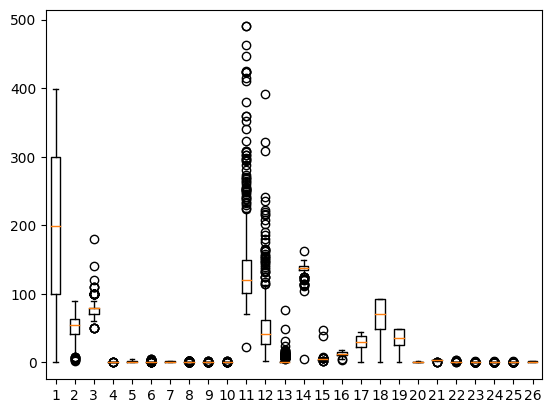

In [ ]:
import matplotlib.pyplot as plt


plt.boxplot(data)
plt.show()

In [ ]:
from scipy import stats



z_scores=np.abs(stats.zscore(data))



thres=2


data_remove=z_scores>thres



In [ ]:
data_remove

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,False,False,False,True,True,False,False,False,True,False,...,False,False,False,False,False,False,False,True,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
396,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
397,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
398,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
cleaned_data=data[~data_remove]

In [ ]:
cleaned_data

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,2,1,0.0,0.0,...,32.0,72.0,34.0,1.0,4.0,1.0,0.0,0.0,0.0,0
1,1,NaN,50.0,1.020,NaN,0.0,2,1,0.0,0.0,...,26.0,56.0,49.0,0.0,3.0,1.0,0.0,0.0,0.0,0
2,2,62.0,80.0,1.010,2.0,NaN,1,1,0.0,0.0,...,19.0,70.0,49.0,0.0,4.0,1.0,1.0,0.0,NaN,0
3,3,48.0,70.0,NaN,NaN,0.0,1,0,NaN,0.0,...,20.0,62.0,19.0,1.0,3.0,1.0,1.0,NaN,NaN,0
4,4,51.0,80.0,1.010,2.0,0.0,1,1,0.0,0.0,...,23.0,68.0,27.0,0.0,3.0,1.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,1,1,0.0,0.0,...,35.0,62.0,30.0,0.0,3.0,1.0,0.0,0.0,0.0,2
396,396,42.0,70.0,1.025,0.0,0.0,1,1,0.0,0.0,...,42.0,72.0,44.0,0.0,3.0,1.0,0.0,0.0,0.0,2
397,397,NaN,80.0,1.020,0.0,0.0,1,1,0.0,0.0,...,37.0,61.0,36.0,0.0,3.0,1.0,0.0,0.0,0.0,2
398,398,NaN,60.0,1.025,0.0,0.0,1,1,0.0,0.0,...,39.0,67.0,41.0,0.0,3.0,1.0,0.0,0.0,0.0,2


{'whiskers': [<matplotlib.lines.Line2D at 0x793045bf97b0>,
 'caps': [<matplotlib.lines.Line2D at 0x793045bfb1c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x793045bf8d90>,
 'medians': [<matplotlib.lines.Line2D at 0x793045bfa740>,
 'fliers': [<matplotlib.lines.Line2D at 0x793045bfa800>,
 'means': []}

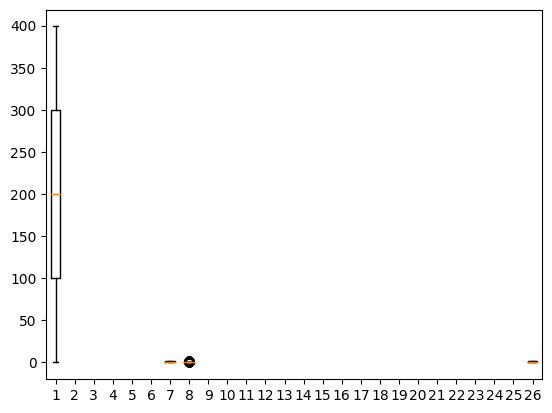

In [ ]:
plt.boxplot(cleaned_data)

In [ ]:

from scipy import stats
z_scores = np.abs(stats.zscore(data))

# Define a threshold for identifying outliers (e.g., Z-Score > 2)
threshold = 2


z=np.abs(stats.zscore(data))

# Create a boolean mask for outliers
outliers = z > threshold

cleaned_data = data[~outliers]

In [ ]:
cleaned_data

In [ ]:
from sklearn.cluster import KMeans

iner=[]
for i in range(1,11):
  model=KMeans(n_clusters=i)
  model.fit(X_train)
  iner.append(model.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
iner

[6201488.937008927,
 3192396.038658863,
 2315427.6623733533,
 1866714.7529216036,
 1632399.918595078,
 1448638.5016355999,
 1279149.5906587197,
 1168821.3815057839,
 1072988.1612748522,
 1013651.7079800218]

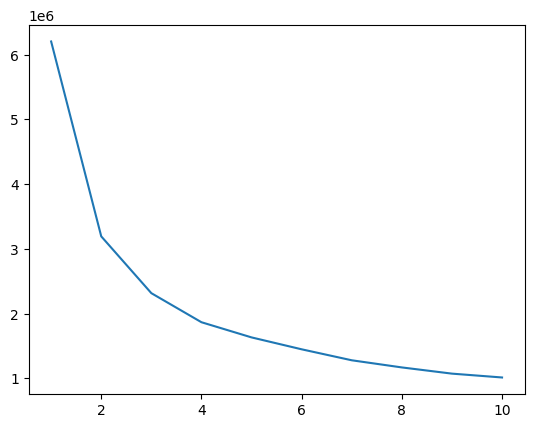

In [ ]:
plt.plot(range(1,11),iner)

In [ ]:
model=KMeans(n_clusters=4)
model.fit(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [ ]:
X_train

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
251,251,23.0,80.0,1.025,0.0,0.0,1,1,0,0,...,17.00,40,90,32,0,3,1,0,0,0
273,273,47.0,80.0,1.020,0.0,0.0,1,1,0,0,...,12.65,44,92,49,0,3,1,0,0,0
169,169,55.0,70.0,1.010,0.0,2.0,2,1,0,0,...,8.70,15,92,49,1,4,1,0,0,1
16,16,47.0,70.0,1.015,2.0,0.0,2,1,0,0,...,12.60,44,92,49,0,3,1,0,0,0
351,351,29.0,80.0,1.020,0.0,0.0,1,1,0,0,...,17.50,28,91,28,0,3,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,127,71.0,60.0,1.015,4.0,0.0,1,1,0,0,...,11.40,23,29,24,1,4,1,1,1,0
258,258,42.0,80.0,1.020,0.0,0.0,1,1,0,0,...,13.90,32,78,37,0,3,1,0,0,0
285,285,66.0,70.0,1.020,0.0,0.0,1,1,0,0,...,16.00,29,49,41,0,3,1,0,0,0
14,14,68.0,80.0,1.010,3.0,2.0,1,0,1,1,...,5.60,4,10,5,1,4,2,1,1,0


In [ ]:
label=model.labels_

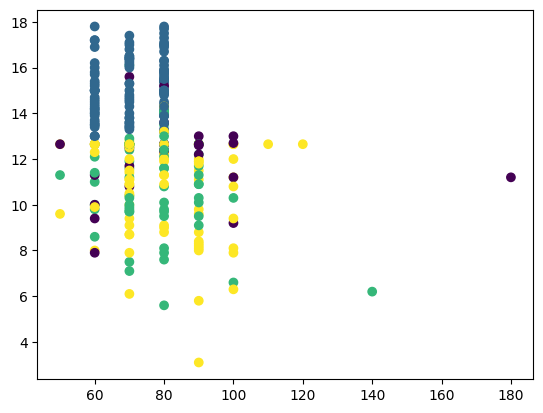

In [ ]:
plt.scatter(X_train['bp'],X_train['hemo'],c=label)